In [23]:
import numpy as np
import pandas as pd

# 1. Характеристики, по которым были сформированы строки в таблице:
 
1. **Возраст(age)** - *Discrete data, от 18 до 80*
2. **Пол(sex)** - *Nominal data, в таблице генерится как 0 -"М" и 1 - "Ж"*
3. **Семейное положение(family)** - *Nominal data, 0 - не женат/замужем, 1 - женат/замужем"
4. **Количество детей на попечении(children)** - *Discrete data, от 0 до 10*
5. **Образование(education)** - *Ordinal data, 0-нет высшего образования, 1-одно высшее образование, 2 - два высших и т.д.* 
6. **Доход заемщика(Income)** - *Continuous data, для каждой группы определяется отдельно(см. далее)*
7. **Стаж заемщика(work_years)** - *Discrete data, от 0 до 62*
8. **Сколько полных лет является клиентом банка(client_bank_years)** - *Discrete data, от 0 до 62*
9. **Количество дней в просрочке(Default_number_days)** - *Discrete data, от 0 без верхнего потолка*
10. **Количество действующих кредитов(Number_of_credits)** - *Discrete data, от 0 без верхнего потолка*
11. **Наличие незавершенных судебных дел(Open_courts)** - *Nominal data, 0 - нет судебных дел, 1-есть незавершенные судебные дела*
12. **Суммы долговых обязательств (Debt_obligations)** - *Continuous data, для каждой группы определяется отдельно(см. далее)*
13. **Был ли случай банкроства-дефолта в прошлом(Default_in_past)** - *Nominal data, 0 - не было случая, 1-был случай*
14. **Был ли случай экономического правонарушения(Courts_in_past)** - *Nominal data, 0 - не было случая, 1-был случай*
15. **Индивидуальный рейтинг заемщика(Rating)** - *Ordinal data, от 0 до 1*
16. **Анализируемые периоды(date_periods)** - *Continuous data, om 2016-09-01 до 2019-09-01
17. **Номер группы клиента** - *Discrete data, от 1 до 3*
18. **Номер  клиента** - *Discrete data, от 1 до 10000*

# 2. Загрузка данных из csv файла 
## (данные формировались на основе файла "Generate date table.ipynb")

In [24]:
filepath = 'output.csv'
df = pd.read_csv(filepath,index_col = ['date_periods','client_number'], parse_dates=['date_periods'])
df.sort_index(inplace=True)

# 3. Описание таблицы (head and describe)

In [25]:
pd.set_option('display.float_format','{:,.3f}'.format)
pd.set_option('display.precision',2)
df.head(10)

age   sex  family  children  education  \
date_periods client_number                                             
2016-10-01   1             33.000 1.000       1     1.000      1.000   
             2             27.000 0.000       0     1.000      2.000   
             3             30.000 1.000       1     2.000      0.000   
             4             46.000 0.000       0     3.000      2.000   
             5             63.000 0.000       0     0.000      0.000   
             6             52.000 1.000       0     3.000      2.000   
             7             54.000 0.000       1     0.000      0.000   
             8             51.000 1.000       1     2.000      0.000   
             9             32.000 1.000       1     1.000      1.000   
             10            34.000 1.000       1     1.000      2.000   

                                Income  work_years  Client_bank_years  \
date_periods client_number                                              
2016-10-01   1              62,950.756      14.000             17.000   
             2              49,430.691      18.000             13.000   
             3              49,773.604      16.000              1.000   
             4             114,256.622      18.000             12.000   
             5              85,601.246       3.000             32.000   
             6              79,522.466       5.000             48.000   
             7              75,642.934      32.000             31.000   
             8             117,329.762      13.000             37.000   
             9              58,416.389       4.000             20.000   
             10             48,912.455       0.000             14.000   

                            Default_number_days  Number_of_credits  \
date_periods client_number                                           
2016-10-01   1                               21              2.000   
             2                                0              5.000   
             3                               24              1.000   
             4                               11              3.000   
             5                               26              3.000   
             6                                0              3.000   
             7                               50              3.000   
             8                                6              3.000   
             9                                0              2.000   
             10                              17              4.000   

                            Open_courts  Debt_obligations  Default_in_past  \
date_periods client_number                                                   
2016-10-01   1                    0.000        22,573.141                1   
             2                    2.000        27,409.934                1   
             3                    1.000        15,898.641                1   
             4                    0.000        47,671.228                1   
             5                    1.000        39,823.088                1   
             6                    1.000        47,472.659                1   
             7                    2.000        50,092.709                1   
             8                    0.000        55,213.346                0   
             9                    4.000        11,327.133                0   
             10                   1.000        10,911.148                0   

                            Courts_in_past  Rating  group  
date_periods client_number                                 
2016-10-01   1                           1   0.437      1  
             2                           0   0.491      1  
             3                           0   0.577      1  
             4                           0   0.875      3  
             5                           0   0.303      2  
             6                           1   0.710      2  
             7                

In [26]:
groups = df.drop(columns=['group'],inplace = True) # использование группы было связано только с формированием таблицы, для создания более предсказуемого и реального dataset

In [27]:
df.describe()

,age,sex,family,children,education,Income,work_years,Client_bank_years,Default_number_days,Number_of_credits,Open_courts,Debt_obligations,Default_in_past,Courts_in_past,Rating
count,"360,000.000","360,000.000","360,000.000","360,000.000","360,000.000","360,000.000","360,000.000","360,000.000","360,000.000","360,000.000","360,000.000","360,000.000","360,000.000","360,000.000","360,000.000"
mean,45.343,0.498,0.526,1.425,1.774,"86,578.361",24.845,24.639,109.362,2.759,1.201,"36,674.210",0.519,0.533,0.631
std,17.703,0.500,0.499,1.273,1.383,"34,467.751",17.910,17.751,91.688,2.073,1.647,"13,448.187",0.500,0.499,0.208
min,18.000,0.000,0.000,0.000,0.000,"4,050.248",0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.151
25%,31.000,0.000,0.000,0.000,1.000,"56,589.358",10.000,10.000,37.000,1.000,0.000,"23,417.159",0.000,0.000,0.474
50%,40.000,0.000,1.000,1.000,2.000,"79,963.695",20.000,20.000,92.000,2.000,0.000,"39,772.234",1.000,1.000,0.636
75%,60.000,1.000,1.000,2.000,3.000,"121,948.696",40.000,39.000,161.000,4.000,2.000,"47,562.464",1.000,1.000,0.785
max,82.000,1.000,1.000,9.000,9.000,"177,155.410",64.000,64.000,732.000,19.000,13.000,"68,726.178",1.000,1.000,1.000


# 4. Формирование выборки для обучения

В условии задачи сказано:
1. Нужно предсказать вероятность дефолта заемщика;
2. У заемщика на настоящее время нет просрочки (Default_number_days = 0);
3. Необходимо предсказать вероятность дефолта на предстоящий год;
4. Информация представлена за 3 года, на начало каждого месяца
* Под настоящим моментом я понимаю сентябрь 2019 года (любой день сентября);
* Под вероятностью дефолта я понимаю просрочку платежа в 90 дней (Default_number_days >= 90);

Тренировка модели подразумевает, что мы моделируем интересующую нас ситуацию в прошлом:

К примеру, если бы к нам пришел заемщик в сентябре 2018 года,  мы предполагаем, что модель может предсказать на основе текущей и/или исторической информации (например информации за предыдующий месяц, квартал, год (для анализа взял промежуток с сентября 2017 по сентябрь 2018 года), что в течении следующего года (с сентября 2018 по сентябрь 2019) у заемщика случится дефолт. 
Данную гипотезу мы можем проверить, так как у нас есть данные за  сентябрь 2018 - сентябрь 2019, поэтому мы можем сформировать таргет для обучения

### Формирование списка заемщиков у которых на сентябрь 2018 года не было задолженности (Default_number_days = 0)

In [28]:
# Отбираем только тех клиентов, которые подходят нам под условие(Default_number_days = 0)
sample_1_start_month = df.loc['2018-Sep'].loc[df.loc['2018-Sep']['Default_number_days'] == 0]
sample_1_start_month.shape

(804, 15)

In [29]:
#Проверка количества строк
df.loc['2018-Sep']['Default_number_days'].value_counts()[0]

804

In [30]:
#Вычлениям индексы подходящих нам заемщиков
sample_1_client_index = sample_1_start_month.index.get_level_values('client_number')

### Далее необходимо определить колонку target (Default_number_days >= 90)

In [31]:
#Отфильтровался по периоду, необходимому для определения таргета, 
#после отобрал заещиков из предыдущего шага Default_number_days = 0
sample_1_target = df.loc[('2018-09-01'):('2019-09-01')].swaplevel().loc[sample_1_client_index]

In [32]:
#Сгруппировал данные по клиенту (использовал функцию max, так как нас интересует если хоть в одном месяце был дефолт)
sample_1_target = sample_1_target.groupby(level = 0)['Default_number_days'].max()
sample_1_target.shape

(804,)

In [33]:
sample_1_target = sample_1_target >= 90
sample_1_target.value_counts()

False    698
True     106
Name: Default_number_days, dtype: int64

### Далее рассмотрим несколько вариантов формирования выборок:

a. *На основе только текущих данных* (то есть для анализа сентября 2018 года, используем только данные на сентябрь 2018)

б. *Агрегированные текущие и исторические данные с сентября 2017- сентябрь 2018* (для анализа взял промежуток в год)

в. *Агрегированные данные нескольких временных окон* (более подробно описано далее)

#### а. *Выборка на основе только текущих данных*

In [34]:
#предположим, что текущей информации о заемщике достаточно для определения вероятности дефолта
#Отфильтровался по периоду, на основе которого будет строиться прогноз, 
#после отобрал заемщиков из  шага Default_number_days = 0
sample_without_hist = df.loc['2018-09-01'].swaplevel().loc[sample_1_client_index].droplevel(1) # уровень с датой больше не нужен
# так как индекс идентичен, можно отсортировать и добавить колонку
sample_1_target.sort_index(inplace = True)
sample_1_group_by.sort_index(inplace = True)
sample_without_hist['target'] = sample_1_target
sample_without_hist

,age,sex,family,children,education,Income,work_years,Client_bank_years,Default_number_days,Number_of_credits,Open_courts,Debt_obligations,Default_in_past,Courts_in_past,Rating,target
client_number,,,,,,,,,,,,,,,,
9,34.000,1.000,1,1.000,3.000,"59,538.986",5.000,21.000,0,0.000,6.000,"11,648.901",0,1,0.308,False
10,36.000,1.000,1,1.000,2.000,"50,616.440",1.000,15.000,0,4.000,0.000,"9,480.825",0,1,0.609,False
18,29.000,1.000,1,1.000,3.000,"90,921.915",19.000,32.000,0,0.000,0.000,"34,768.791",1,0,0.601,False
24,74.000,1.000,0,0.000,2.000,"146,238.669",19.000,32.000,0,4.000,0.000,"52,642.649",0,1,0.758,False
42,67.000,1.000,1,0.000,0.000,"129,675.608",19.000,2.000,0,2.000,0.000,"50,454.734",1,1,0.660,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9915,52.000,0.000,0,1.000,2.000,"128,980.486",18.000,14.000,0,1.000,0.000,"47,253.351",1,1,0.890,False
9936,38.000,0.000,1,1.000,2.000,"43,603.221",11.000,12.000,0,9.000,4.000,"9,331.009",1,1,0.654,False
9958,33.000,0.000,1,2.000,1.000,"138,728.559",36.000,52.000,0,2.000,1.000,"47,654.948",0,1,0.822,False


#### б. *Выборка на основе агрегированных текущих и исторических данных с сентября 2017- сентябрь 2018*

#### Для выбранных из общей таблицы заемщиков необходимо вычленить данные за предыдующий год (с сентября 2017 по сентябрь 2018 - 12 месяцев)

In [35]:
#Отфильтровался по периоду, на основе которого будет строиться прогноз, 
#после отобрал заемщиков из  шага Default_number_days = 0
sample_1 = df.loc[('2017-09-01'):('2018-09-01')]
sample_1 = sample_1.swaplevel().loc[sample_1_client_index]

In [36]:
sample_1.describe()

,age,sex,family,children,education,Income,work_years,Client_bank_years,Default_number_days,Number_of_credits,Open_courts,Debt_obligations,Default_in_past,Courts_in_past,Rating
count,"10,452.000","10,452.000","10,452.000","10,452.000","10,452.000","10,452.000","10,452.000","10,452.000","10,452.000","10,452.000","10,452.000","10,452.000","10,452.000","10,452.000","10,452.000"
mean,47.478,0.499,0.554,1.520,1.848,"96,304.676",26.247,25.642,7.629,2.421,0.888,"39,958.571",0.534,0.550,0.657
std,17.544,0.500,0.497,1.396,1.378,"35,593.809",18.033,17.849,17.168,1.906,1.445,"13,042.042",0.499,0.497,0.211
min,19.000,0.000,0.000,0.000,0.000,"20,305.968",0.000,0.000,0.000,0.000,0.000,"2,369.277",0.000,0.000,0.169
25%,33.000,0.000,0.000,0.000,1.000,"65,389.904",10.000,10.000,0.000,1.000,0.000,"30,376.184",0.000,0.000,0.505
50%,45.000,0.000,1.000,1.000,2.000,"93,647.810",22.000,21.000,0.000,2.000,0.000,"43,394.054",1.000,1.000,0.662
75%,63.000,1.000,1.000,2.000,3.000,"129,587.076",42.000,41.000,4.000,4.000,1.000,"50,094.191",1.000,1.000,0.819
max,81.000,1.000,1.000,8.000,8.000,"162,237.512",63.000,63.000,160.000,13.000,9.000,"64,865.165",1.000,1.000,1.000


#### Далее необходимо сгруппировать данные для анализа:
Так как в модель нельзя передать все 12 строчек по клиенту (иначе для каждой строчке она посчитает вероятность дефолта отдельно), я сгруппировал строчки в одну:
1. **Возраст(age)** - * использовал функцию mean*
2. **Пол(sex)** - *max*
3. **Семейное положение(family)** - *mean*
4. **Количество детей на попечении(children)** - *mean*
5. **Образование(education)** - *mean* 
6. **Доход заемщика(Income)** - *mean*
7. **Стаж заемщика(work_years)** - *mean*
8. **Сколько полных лет является клиентом банка(client_bank_years)** - *mean*
9. **Количество дней в просрочке(Default_number_days)** - *max*
10. **Количество действующих кредитов(Number_of_credits)** - *mean*
11. **Наличие незавершенных судебных дел(Open_courts)** - *mean*
12. **Суммы долговых обязательств (Debt_obligations)** - *mean*
13. **Был ли случай банкроства-дефолта в прошлом(Default_in_past)** - *max - нас интересует факт наличия в любом периоде* 
14. **Был ли случай экономического правонарушения(Courts_in_past)** - *max  - нас интересует факт наличия в любом периоде*
15. **Индивидуальный рейтинг заемщика(Rating)** - *mean*

Данный выбор может быть изменен, что повлияет на точность модели

In [37]:
sample_1_group_by = sample_1.groupby(level = 0).agg({'age':'mean','sex':'max','family':'mean',
                                                    'children':'mean','education':'mean','Income':'mean',
                                                    'work_years':'mean','Client_bank_years':'mean','Default_number_days':'max',
                                                    'Number_of_credits':'mean','Open_courts':'mean','Debt_obligations':'mean',
                                                    'Default_in_past':'max','Courts_in_past':'max','Rating':'mean'})

In [38]:
sample_1_group_by.head()

,age,sex,family,children,education,Income,work_years,Client_bank_years,Default_number_days,Number_of_credits,Open_courts,Debt_obligations,Default_in_past,Courts_in_past,Rating
client_number,,,,,,,,,,,,,,,
9,33.154,1.000,1.000,1.000,2.385,"60,028.821",4.769,21.000,125,0.000,5.308,"11,097.314",0,1,0.322
10,35.308,1.000,1.000,1.000,2.000,"50,570.258",0.846,14.923,45,3.846,0.000,"10,209.022",0,1,0.607
18,28.538,1.000,1.000,1.000,3.000,"91,561.105",19.000,31.077,14,0.000,0.000,"34,781.875",1,0,0.590
24,73.231,1.000,0.000,0.000,2.000,"143,051.447",18.846,31.923,0,4.000,0.000,"52,445.537",0,1,0.728
42,66.462,1.000,1.000,0.000,0.000,"126,694.486",18.077,1.769,8,2.000,0.000,"50,464.701",1,1,0.636


### Добавляем колонку target к таблице

In [39]:
# так как индекс идентичен, можно отсортировать и добавить колонку
sample_1_target.sort_index(inplace = True)
sample_1_group_by.sort_index(inplace = True)
sample_1_group_by['target'] = sample_1_target

#### *в. Выборка на основе агрегированных данных нескольких временных окон*

#### В дополнение к сентябрьскому окну можно использовать другие временные окна:
1. с августа 2017 по август 2018 (таргет с августа 2018 по август 2019)
2. с июля 2017 по июль 2018 (таргет с июля 2018 по июль 2019)
3. с июня 2017 по июнь 2018 (таргет с июня 2018 по июнь 2019)
4. с мая 2017 по май 2018 (таргет с мая 2018 по май 2019)
5. с апреля 2017 по апрель 2018 (таргет с апреля 2018 по апрель 2019)
6. с марта 2017 по март 2018 (таргет с марта 2018 по март 2019)
7. с февраля 2017 по февраль 2018 (таргет с февраля 2018 по февраль 2019)
8. с января 2017 по январь 2018 (таргет с января 2018 по январь 2019)
9. с декабря 2016 по декабрь 2017 (таргет с декабря 2017 по декабрь 2018)
10. с ноября 2016 по ноябрь 2017 (таргет с ноября 2017 по ноябрь 2018)
11. с октября 2016 по октябрь 2017 (таргет с октября 2017 по октябрь 2018)

Таким образом, можно увеличить выборку, так как принцип в целях прогнозирования идентичен для любого месяца (не только сентября)
(для обучения модели мы берем  месяц, для которой у нас есть данные, как после этого месяца (для формирования таргета), так и до (для формирования исторической основы)
(теоретически, может уменьшить overfit модели, если ее будут использовать не только для сентябрьских клиентов)

С другой стороны, мы дублируем информацию (так как периоды пересекаются, в разные окна попадают идентичные записи)
Поэтому, можно попробовать разные выборки и выбрать, у которой будет лучше метрика

In [40]:
def create_sample_group(start_date, end_date,future_date):
    """Повторяет последовательность действий по формированию сентябрьской выборки
       На входе получает три даты (исторического начала, анализируемой даты и даты для таргета)
       На выходе формирует выборку за полученный период
    """
    
    # Выбор клиентов с Default_number_days = 0
    sample_start_month = df.loc[end_date].loc[df.loc[end_date]['Default_number_days'] == 0]
    sample_client_index = sample_start_month.index.get_level_values('client_number')
    # Формирование таргета
    sample_target = df.loc[(end_date):(future_date)].swaplevel().loc[sample_client_index]
    sample_target = sample_target.groupby(level = 0)['Default_number_days'].max()
    sample_target = sample_target >= 90
    # Формирования исторических данных
    sample = df.loc[(start_date):(end_date)]
    sample = sample.swaplevel().loc[sample_client_index]
    sample_group_by = sample.groupby(level = 0).agg({'age':'mean','sex':'max','family':'mean',
                                                    'children':'mean','education':'mean','Income':'mean',
                                                    'work_years':'mean','Client_bank_years':'mean','Default_number_days':'max',
                                                    'Number_of_credits':'mean','Open_courts':'mean','Debt_obligations':'mean',
                                                    'Default_in_past':'max','Courts_in_past':'max','Rating':'mean'})
    sample_target.sort_index(inplace = True)
    sample_group_by.sort_index(inplace = True)
    sample_group_by['target'] = sample_target
    return sample_group_by

In [41]:
dates_window = [('2017-08-01','2018-08-01','2019-08-01'),('2017-07-01','2018-07-01','2019-07-01'),('2017-06-01','2018-06-01','2019-06-01'),
               ('2017-05-01','2018-05-01','2019-05-01'),('2017-04-01','2018-04-01','2019-04-01'),('2017-03-01','2018-03-01','2019-03-01'),
               ('2017-02-01','2018-02-01','2019-02-01'),('2017-01-01','2018-01-01','2019-01-01'),('2016-12-01','2017-12-01','2018-12-01'),
               ('2016-11-01','2017-11-01','2018-11-01'),('2016-10-01','2017-10-01','2018-10-01')]
samples_list = [sample_1_group_by] # сентябрьская выборка включается в полную выборку
for dates in dates_window:
    sample = create_sample_group(*dates)
    print(f'\nДля выборки с окном дат {dates[0]} - {dates[1]} - {dates[2]} следующее распределение колонки таргета')
    print(sample['target'].value_counts())
    samples_list.append(sample)


Для выборки с окном дат 2017-08-01 - 2018-08-01 - 2019-08-01 следующее распределение колонки таргета
False    700
True     107
Name: target, dtype: int64

Для выборки с окном дат 2017-07-01 - 2018-07-01 - 2019-07-01 следующее распределение колонки таргета
False    735
True     114
Name: target, dtype: int64

Для выборки с окном дат 2017-06-01 - 2018-06-01 - 2019-06-01 следующее распределение колонки таргета
False    763
True     127
Name: target, dtype: int64

Для выборки с окном дат 2017-05-01 - 2018-05-01 - 2019-05-01 следующее распределение колонки таргета
False    815
True     122
Name: target, dtype: int64

Для выборки с окном дат 2017-04-01 - 2018-04-01 - 2019-04-01 следующее распределение колонки таргета
False    832
True     141
Name: target, dtype: int64

Для выборки с окном дат 2017-03-01 - 2018-03-01 - 2019-03-01 следующее распределение колонки таргета
False    847
True     146
Name: target, dtype: int64

Для выборки с окном дат 2017-02-01 - 2018-02-01 - 2019-02-01 следующе

### Финальное распределение колонки таргет

In [42]:
sample_group_by = pd.concat(samples_list,sort=True)
sample_group_by['target'].value_counts()

False    10115
True      1751
Name: target, dtype: int64

In [43]:
sample_group_by

,Client_bank_years,Courts_in_past,Debt_obligations,Default_in_past,Default_number_days,Income,Number_of_credits,Open_courts,Rating,age,children,education,family,sex,target,work_years
client_number,,,,,,,,,,,,,,,,
9,21.000,1,"11,097.314",0,125,"60,028.821",0.000,5.308,0.322,33.154,1.000,2.385,1.000,1.000,False,4.769
10,14.923,1,"10,209.022",0,45,"50,570.258",3.846,0.000,0.607,35.308,1.000,2.000,1.000,1.000,False,0.846
18,31.077,0,"34,781.875",1,14,"91,561.105",0.000,0.000,0.590,28.538,1.000,3.000,1.000,1.000,False,19.000
24,31.923,1,"52,445.537",0,0,"143,051.447",4.000,0.000,0.728,73.231,0.000,2.000,0.000,1.000,False,18.846
42,1.769,1,"50,464.701",1,8,"126,694.486",2.000,0.000,0.636,66.462,0.000,0.000,1.000,1.000,False,18.077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9968,17.000,0,"54,720.625",1,20,"120,660.880",1.000,0.000,0.422,39.692,0.000,3.000,1.000,0.000,False,29.000
9972,18.154,1,"37,141.759",0,51,"63,022.310",4.000,2.000,0.761,35.615,2.000,2.000,1.000,0.000,False,1.154
9973,57.077,0,"50,249.617",0,28,"109,887.008",0.000,0.000,0.696,39.462,2.000,4.000,0.000,0.000,False,51.077


In [44]:
# Изменил тип колонок, иначе sklearn выдает ошибку при трансформации
sample_group_by = sample_group_by.astype('float64')
sample_1_group_by = sample_1_group_by.astype('float64')
sample_without_hist = sample_without_hist.astype('float64')

# 5. Train_test_split, подготовка моделей

Первоначальное деление выборки на train и test set (test set будет использован для окончательной оценки лучшей модели)

In [45]:
from sklearn.model_selection import train_test_split

### а. Для выборки только c текущими данными

In [46]:
X_his = sample_without_hist.drop(['target'], axis = 1)
y_his = sample_without_hist['target']
X_train_his, X_test_his, y_train_his, y_test_his = train_test_split(X_his, y_his, test_size=0.20, random_state=0, stratify = y_his) # imbalanced dataset

### б. Для выборки с текущими и историческими данными сентября 

In [48]:
X_sep = sample_1_group_by.drop(['target'], axis = 1)
y_sep = sample_1_group_by['target']
X_train_sep, X_test_sep, y_train_sep, y_test_sep = train_test_split(X_sep, y_sep, test_size=0.20, random_state=0, stratify = y_sep) # imbalanced dataset

### в. Для полной выборки

In [50]:
X = sample_group_by.drop(['target'], axis = 1)
y = sample_group_by['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, stratify = y) # imbalanced dataset

# 6. Подготовка моделей

In [51]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

In [52]:
# Отобрал для тестирования 2 трансформера
standard_scaler = StandardScaler()
minmax = MinMaxScaler()
transformers = [standard_scaler,minmax]

In [53]:
# Отобрал для тестирования 4 модели(каждая может выдавать predict_proba)
logreg = LogisticRegression(solver = 'lbfgs') # без определения sklearn выдает предупреждение
gaus_nb = GaussianNB()
bern_nb = BernoulliNB()
random_f = RandomForestClassifier(n_estimators = 100) # без определения sklearn выдает предупреждение
predictors = [logreg,gaus_nb,bern_nb,random_f]

### Я не отключал предупреждения sklearn 

Вначале я выбрал f1 метрику, но если ее подставить в кросс-валидацию, то мне sklearn выдает ошибку, что по логистической регресии нельзя посчитать f1.

я проверил, что если тренировать логистическую регрессию , то она всегда выдает предсказание 0 (то есть не может определить где дефолт), как я понял из за этого sklearn выдает ошибку

#### a. Кросс-валидация моделей для выборки только c текущими данными

In [56]:
scores_list_his = {}
for predictor in predictors:
    for transformer in transformers:
        pipeline = make_pipeline(transformer,predictor)
        score =cross_val_score(pipeline, X_train_his, y_train_his, cv=5, scoring='roc_auc').mean() #accuracy не подходит, так как imbalanced dataset
        print(f'Посчитан roc_auc по модели с {type(transformer).__name__} - transformer и {type(predictor).__name__} - predictor')
        scores_list_his[(type(transformer).__name__,type(predictor).__name__)] = round(score,3)
for predictor in predictors:
        score =cross_val_score(predictor, X_train_his, y_train_his, cv=5, scoring='roc_auc').mean() #accuracy не подходит, так как imbalanced dataset
        print(f'Посчитан roc_auc по модели без трансформера и {type(predictor).__name__} - predictor')
        scores_list_his[('Без трансформера',type(predictor).__name__)] = round(score,3)

Посчитан roc_auc по модели с StandardScaler - transformer и LogisticRegression - predictor
Посчитан roc_auc по модели с MinMaxScaler - transformer и LogisticRegression - predictor
Посчитан roc_auc по модели с StandardScaler - transformer и GaussianNB - predictor
Посчитан roc_auc по модели с MinMaxScaler - transformer и GaussianNB - predictor
Посчитан roc_auc по модели с StandardScaler - transformer и BernoulliNB - predictor
Посчитан roc_auc по модели с MinMaxScaler - transformer и BernoulliNB - predictor
Посчитан roc_auc по модели с StandardScaler - transformer и RandomForestClassifier - predictor
Посчитан roc_auc по модели с MinMaxScaler - transformer и RandomForestClassifier - predictor
Посчитан roc_auc по модели без трансформера и LogisticRegression - predictor
Посчитан roc_auc по модели без трансформера и GaussianNB - predictor
Посчитан roc_auc по модели без трансформера и BernoulliNB - predictor
Посчитан roc_auc по модели без трансформера и RandomForestClassifier - predictor


#### б. Кросс-валидация моделей для выборки с текущими и историческими данными сентября 

In [59]:
scores_list_sep = {}
for predictor in predictors:
    for transformer in transformers:
        pipeline = make_pipeline(transformer,predictor)
        score =cross_val_score(pipeline, X_train_sep, y_train_sep, cv=5, scoring='roc_auc').mean() #accuracy не подходит, так как imbalanced dataset
        print(f'Посчитан roc_auc по модели с {type(transformer).__name__} - transformer и {type(predictor).__name__} - predictor')
        scores_list_sep[(type(transformer).__name__,type(predictor).__name__)] = round(score,3)
for predictor in predictors:
        score =cross_val_score(predictor, X_train_sep, y_train_sep, cv=5, scoring='roc_auc').mean() #accuracy не подходит, так как imbalanced dataset
        print(f'Посчитан roc_auc по модели без трансформера и {type(predictor).__name__} - predictor')
        scores_list_sep[('Без трансформера',type(predictor).__name__)] = round(score,3)

Посчитан roc_auc по модели с StandardScaler - transformer и LogisticRegression - predictor
Посчитан roc_auc по модели с MinMaxScaler - transformer и LogisticRegression - predictor
Посчитан roc_auc по модели с StandardScaler - transformer и GaussianNB - predictor
Посчитан roc_auc по модели с MinMaxScaler - transformer и GaussianNB - predictor
Посчитан roc_auc по модели с StandardScaler - transformer и BernoulliNB - predictor
Посчитан roc_auc по модели с MinMaxScaler - transformer и BernoulliNB - predictor
Посчитан roc_auc по модели с StandardScaler - transformer и RandomForestClassifier - predictor
Посчитан roc_auc по модели с MinMaxScaler - transformer и RandomForestClassifier - predictor
Посчитан roc_auc по модели без трансформера и LogisticRegression - predictor
Посчитан roc_auc по модели без трансформера и GaussianNB - predictor
Посчитан roc_auc по модели без трансформера и BernoulliNB - predictor
Посчитан roc_auc по модели без трансформера и RandomForestClassifier - predictor


#### в. Кросс-валидация моделей для полной выборки

In [60]:
scores_list = {}
for predictor in predictors:
    for transformer in transformers:
        pipeline = make_pipeline(transformer,predictor)
        score =cross_val_score(pipeline, X_train, y_train, cv=5, scoring='roc_auc').mean() #accuracy не подходит, так как imbalanced dataset
        print(f'Посчитан roc_auc по модели с {type(transformer).__name__} - transformer и {type(predictor).__name__} - predictor')
        scores_list[(type(transformer).__name__,type(predictor).__name__)] = round(score,3)
for predictor in predictors:
        score =cross_val_score(predictor, X_train, y_train, cv=5, scoring='roc_auc').mean() #accuracy не подходит, так как imbalanced dataset
        print(f'Посчитан roc_auc по модели без трансформера и {type(predictor).__name__} - predictor')
        scores_list[('Без трансформера',type(predictor).__name__)] = round(score,3)

Посчитан roc_auc по модели с StandardScaler - transformer и LogisticRegression - predictor
Посчитан roc_auc по модели с MinMaxScaler - transformer и LogisticRegression - predictor
Посчитан roc_auc по модели с StandardScaler - transformer и GaussianNB - predictor
Посчитан roc_auc по модели с MinMaxScaler - transformer и GaussianNB - predictor
Посчитан roc_auc по модели с StandardScaler - transformer и BernoulliNB - predictor
Посчитан roc_auc по модели с MinMaxScaler - transformer и BernoulliNB - predictor
Посчитан roc_auc по модели с StandardScaler - transformer и RandomForestClassifier - predictor
Посчитан roc_auc по модели с MinMaxScaler - transformer и RandomForestClassifier - predictor
Посчитан roc_auc по модели без трансформера и LogisticRegression - predictor
Посчитан roc_auc по модели без трансформера и GaussianNB - predictor
Посчитан roc_auc по модели без трансформера и BernoulliNB - predictor
Посчитан roc_auc по модели без трансформера и RandomForestClassifier - predictor


#### а. Оценка для выборки только c текущими данными

In [61]:
scores_list_his

{('StandardScaler', 'LogisticRegression'): 0.608,
 ('MinMaxScaler', 'LogisticRegression'): 0.612,
 ('StandardScaler', 'GaussianNB'): 0.645,
 ('MinMaxScaler', 'GaussianNB'): 0.645,
 ('StandardScaler', 'BernoulliNB'): 0.615,
 ('MinMaxScaler', 'BernoulliNB'): 0.508,
 ('StandardScaler', 'RandomForestClassifier'): 0.609,
 ('MinMaxScaler', 'RandomForestClassifier'): 0.614,
 ('Без трансформера', 'LogisticRegression'): 0.666,
 ('Без трансформера', 'GaussianNB'): 0.664,
 ('Без трансформера', 'BernoulliNB'): 0.474,
 ('Без трансформера', 'RandomForestClassifier'): 0.602}

#### б. Оценка выборки с текущими и историческими данными сентября

In [62]:
scores_list_sep

{('StandardScaler', 'LogisticRegression'): 0.613,
 ('MinMaxScaler', 'LogisticRegression'): 0.617,
 ('StandardScaler', 'GaussianNB'): 0.647,
 ('MinMaxScaler', 'GaussianNB'): 0.647,
 ('StandardScaler', 'BernoulliNB'): 0.638,
 ('MinMaxScaler', 'BernoulliNB'): 0.615,
 ('StandardScaler', 'RandomForestClassifier'): 0.585,
 ('MinMaxScaler', 'RandomForestClassifier'): 0.601,
 ('Без трансформера', 'LogisticRegression'): 0.691,
 ('Без трансформера', 'GaussianNB'): 0.672,
 ('Без трансформера', 'BernoulliNB'): 0.616,
 ('Без трансформера', 'RandomForestClassifier'): 0.59}

#### в.Оценки для полной выборки

In [63]:
scores_list

{('StandardScaler', 'LogisticRegression'): 0.663,
 ('MinMaxScaler', 'LogisticRegression'): 0.663,
 ('StandardScaler', 'GaussianNB'): 0.644,
 ('MinMaxScaler', 'GaussianNB'): 0.644,
 ('StandardScaler', 'BernoulliNB'): 0.647,
 ('MinMaxScaler', 'BernoulliNB'): 0.636,
 ('StandardScaler', 'RandomForestClassifier'): 0.947,
 ('MinMaxScaler', 'RandomForestClassifier'): 0.948,
 ('Без трансформера', 'LogisticRegression'): 0.65,
 ('Без трансформера', 'GaussianNB'): 0.646,
 ('Без трансформера', 'BernoulliNB'): 0.635,
 ('Без трансформера', 'RandomForestClassifier'): 0.949}

Если анализировать по этим данным, то лучшей моделью является RandomForest вне зависимости от трансформера (трансформеры не влияют на деревья),по полученным результатам меня очень смущает, что f1 не может быть посчитана по логистической регрессии (потому что логистическая регрессия всегда классифицирует как не дефолт - 0), но так как я формировал данные в случайном порядке, возможно это повлияло (нет линейности данных).

При этом, хорошо себя показал Random Forest, что по-моему логично (сильная сторона - легко справляется с нелинейностью данных, слабая - не умеет экстрополировать, но так как  я формировал выборку таким образом, что у меня нет линейного роста, а есть колебания значений, то это совпадает с полученными результатами).

Но не понимаю, почему тогда Naive bayes не справился также хорошо

# 7. Проверка лучшей модели на тестовых данных

In [64]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [65]:
best_model = random_f
best_model.fit(X_train,y_train)
score = roc_auc_score(y_test,best_model.predict(X_test))
print(f'Конечная roc_auc_score модели {score:.2f}')

Конечная roc_auc_score модели 0.84


In [66]:
confusion_matrix(y_test,best_model.predict(X_test))

array([[2002,   22],
       [ 111,  239]])

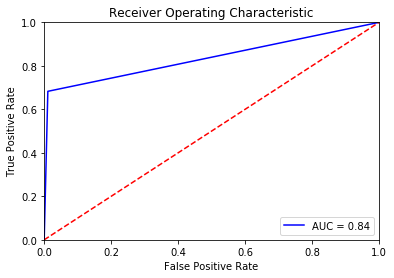

In [67]:
fpr, tpr, thresholds = roc_curve(y_test,best_model.predict(X_test), pos_label=1)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Вероятность дефолта можно получить с помощью метода модели predict_proba

In [68]:
best_model.predict_proba(X_test)

array([[0.99, 0.01],
       [1.  , 0.  ],
       [0.92, 0.08],
       ...,
       [0.11, 0.89],
       [1.  , 0.  ],
       [0.78, 0.22]])